# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Número de saudáveis e doentes
num_saudaveis = df[df['flag_doente'] == 0]['flag_doente'].count()
num_doentes = df[df['flag_doente'] == 1]['flag_doente'].count()

# Total
total = num_saudaveis + num_doentes

# Quantidade média de doentes
media_doentes = num_doentes / total

# Odds
odds = num_doentes / num_saudaveis

# Odds ratio (usando o total como referência)
odds_ratio_total_ref = odds / ((total - num_doentes) / (total - num_saudaveis))

# Logito (LOG(Odds))
logito = np.log(odds)

# LOG do Odds ratio (com o total como referência) - Weight of Evidence (WOE)
woe = np.log(odds_ratio_total_ref)

# Exibindo as estatísticas
print(f"Número de Saudáveis: {num_saudaveis}")
print(f"Número de Doentes: {num_doentes}")
print(f"Total: {total}")
print(f"Quantidade Média de Doentes: {media_doentes:.4f}")
print(f"Odds: {odds:.4f}")
print(f"Odds Ratio (Total como referência): {odds_ratio_total_ref:.4f}")
print(f"Logito (LOG(Odds)): {logito:.4f}")
print(f"Weight of Evidence (WOE): {woe:.4f}")


Número de Saudáveis: 164
Número de Doentes: 139
Total: 303
Quantidade Média de Doentes: 0.4587
Odds: 0.8476
Odds Ratio (Total como referência): 0.7184
Logito (LOG(Odds)): -0.1654
Weight of Evidence (WOE): -0.3308


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [24]:
import pandas as pd
import numpy as np

# Carregue os dados novamente, se necessário
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Adicione a coluna 'flag_doente' novamente
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Categorize a variável age em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70, 80], labels=['30-39', '40-49', '50-59', '60-69', '70-80'])

# Estatísticas para cada grupo
age_stats = df.groupby('age_group').agg({
    'flag_doente': ['count', 'sum', lambda x: x.sum() / x.count()],
    'age': 'mean'
}).reset_index()

# Renomear colunas
age_stats.columns = ['age_group', 'total', 'num_doentes', 'prop_doentes', 'mean_age']

# Exibir as estatísticas
print(age_stats)



  age_group  total  num_doentes  prop_doentes   mean_age
0     30-39     17            6      0.352941  37.294118
1     40-49     76           23      0.302632  45.026316
2     50-59    130           66      0.507692  55.761538
3     60-69     73           43      0.589041  64.671233
4     70-80      6            1      0.166667  73.333333


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

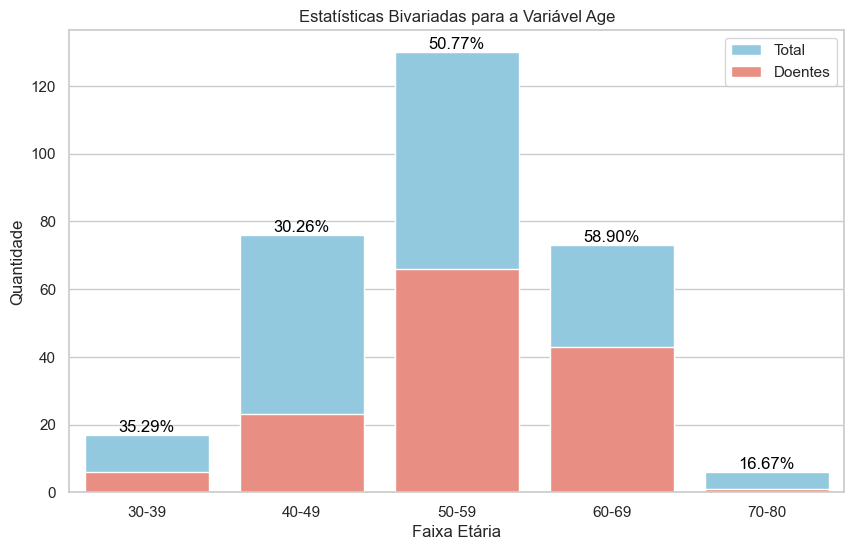

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure o estilo do seaborn
sns.set(style="whitegrid")

# Converta a coluna age_group para string para evitar warnings
age_stats['age_group'] = age_stats['age_group'].astype(str)

# Crie um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))

# Barra para o número total de observações em cada grupo
sns.barplot(x='age_group', y='total', data=age_stats, color='skyblue', label='Total')

# Barra para o número de pessoas doentes em cada grupo
sns.barplot(x='age_group', y='num_doentes', data=age_stats, color='salmon', label='Doentes')

# Anotações nas barras com a proporção de doentes
for index, row in age_stats.iterrows():
    plt.text(index, row['total'], f"{row['prop_doentes']*100:.2f}%", color='black', ha="center", va="bottom")

# Ajustes de layout
plt.title('Estatísticas Bivariadas para a Variável Age')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.legend()

# Salvar como PNG
plt.savefig('estatisticas_bivariadas_age.png')

# Exibir o gráfico
plt.show()
